# Pandas

Это библиотека для анализа данных. С помощью неё можно загружать, обрабатывать и анализировать табличные данные, загружая их из csv, из БД sql и так далее, даже из mongoDB. Это такой особый "Excel". Если вы познаете всю мощью pandas, вам всё захочется делеть через него.

## Литература 

- [Шпаргалка по pandas](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- [Pandas cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)
- [Индексация в pandas](https://pandas.pydata.org/pandas-docs/stable/indexing.html)
- [Работа с пропусками в pandas](https://pandas.pydata.org/pandas-docs/stable/missing_data.html)

In [1]:
# Если нужно, то раскомментируйте строчку или поставьте из консоли зависимости
#!pip install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np

print(np.__version__)
print(pd.__version__)

2.1.1
2.2.2


Основными структурами данных в Pandas являются классы Series и DataFrame:
- Series одномерный индексированный массив данных некоторого фиксированного типа.
- DataFrame - двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. То есть это набор Series с именами.

Внутри себя pandas использует библиотеку numpy, поэтому обычно их используют сразу и вместе. Многие функции, знакомые нам с numpy тут работают.

Рассмотрим по отдельности Series и Dataframe

## Series

In [3]:
?pd.Series

Init signature:
pd.Series(
    data=None,
    index=None,
    dtype: 'Dtype | None' = None,
    name=None,
    copy: 'bool | None' = None,
    fastpath: 'bool | lib.NoDefault' = <no_default>,
) -> 'None'
Docstring:     
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, \*, \*\*) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series. If data is a dict, argument order is
    maintained.
index : array-like or Index (1d)
    

In [4]:
# Series состоящий из чисел, кстати можно хранить numpy NaN

s=pd.Series([3,5,1,7,np.nan, 5])
s

0    3.0
1    5.0
2    1.0
3    7.0
4    NaN
5    5.0
dtype: float64

In [5]:
s[3], s[4]  # доступна индексация

(np.float64(7.0), np.float64(nan))

In [6]:
# Ключами могут быть не только числа, но и строки

s = pd.Series(np.arange(5), index=list('ABCDE'))
s

A    0
B    1
C    2
D    3
E    4
dtype: int64

In [7]:
s['A'], s['E']

(np.int64(0), np.int64(4))

In [8]:
# Точно так же как и numpy pandas поддерживает логическое индексирование(маски)

s[s > 2]

D    3
E    4
dtype: int64

In [9]:
s[:2] # можно даже применять обычное индексирование, если ваши индексы это строки

A    0
B    1
dtype: int64

In [10]:
# Над Series можно выполнять функции из numpy!
np.exp(s)

A     1.000000
B     2.718282
C     7.389056
D    20.085537
E    54.598150
dtype: float64

In [11]:
s.apply(lambda el: print(el * 2))

0
2
4
6
8


A    None
B    None
C    None
D    None
E    None
dtype: object

In [12]:
# можно как и в np.argmax вызвать idxmax, то есть idx максимального эжлемента
s.idxmax()

'E'

## DataFrame

Из документации:

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame

In [13]:
# посмотриеть документацию
?pd.DataFrame

Init signature:
pd.DataFrame(
    data=None,
    index: 'Axes | None' = None,
    columns: 'Axes | None' = None,
    dtype: 'Dtype | None' = None,
    copy: 'bool | None' = None,
) -> 'None'
Docstring:     
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its index. This alignment also
    occurs if data is a Series or a DataFrame itself. Alignment is done on
    Series/DataFrame inputs.

    If data is a list of dicts, column order follows 

In [14]:
# Создать таблицу (DataFrame) можно в лоб - просто перевести словарь в таблицу

df = pd.DataFrame({'a': np.random.rand(5), 
              'b': list('hello'), 
              'c': np.linspace(0,1,5)})
df # если вы заканчиваете ячейку датафреймом, то jupyter красиво нарисует таблицу.

,a,b,c
0,0.711738,h,0.00
1,0.697792,e,0.25
2,0.079907,l,0.50
3,0.011239,l,0.75
4,0.894056,o,1.00


In [15]:
# можно построить таблицу на основе numpy матрицы

indexes = pd.date_range('20170101', periods=12)  # создадим timeseries индексы!
indexes

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12'],
              dtype='datetime64[ns]', freq='D')

In [16]:
matrix = np.random.randn(12, 5)  # матрица с данными!
matrix

array([[-1.66126110e+00, -5.84204972e-01,  5.41283223e-01,
        -5.10597111e-01, -6.70733961e-01],
       [-4.72834362e-01, -2.28934839e-03, -7.73785722e-01,
        -5.82654415e-01, -4.90999878e-01],
       [-1.23562405e+00, -6.24647391e-01,  7.05612279e-01,
        -5.76366354e-01, -5.60661641e-01],
       [-7.01106061e-01, -4.14111988e-01,  2.94060137e-01,
         4.42907233e-01, -4.36847371e-01],
       [-2.92871892e-02,  8.54228204e-01,  5.84180831e-01,
        -6.13574821e-01,  1.04977212e-01],
       [-7.04176629e-01, -1.90538633e-01,  6.66276660e-02,
         9.66034008e-01, -1.06139436e+00],
       [-1.32803067e+00,  1.62204552e+00, -2.71251869e-01,
         7.44289179e-02,  3.40269772e-01],
       [-5.95876793e-01,  8.55809535e-01, -2.57180848e-01,
         5.44788188e-01, -1.13195924e+00],
       [ 2.89272338e-01, -1.33389839e+00,  1.32725838e+00,
         3.78754889e-01,  1.18670988e+00],
       [ 1.12589007e+00,  2.97705815e+00,  1.20388015e+00,
        -4.53465488e-01

In [17]:
df = pd.DataFrame(data=matrix, index=indexes, columns=['a1', 'a2', 'a3', 'a4', 'a5'])
df.head(5)  # покажем только первые 5 элементов таблицы

,a1,a2,a3,a4,a5
2017-01-01,-1.661261,-0.584205,0.541283,-0.510597,-0.670734
2017-01-02,-0.472834,-0.002289,-0.773786,-0.582654,-0.491000
2017-01-03,-1.235624,-0.624647,0.705612,-0.576366,-0.560662
2017-01-04,-0.701106,-0.414112,0.294060,0.442907,-0.436847
2017-01-05,-0.029287,0.854228,0.584181,-0.613575,0.104977


### Индексация, селекция и поиск в DataFrame

https://pandas.pydata.org/pandas-docs/stable/indexing.html

Всё точно так же как и в numpy. То есть мы можем выбрать только те строки, для которых выполняется условие по одной из колонок.

In [18]:
df[df['a1'] > 0]

,a1,a2,a3,a4,a5
2017-01-09,0.289272,-1.333898,1.327258,0.378755,1.186710
2017-01-10,1.125890,2.977058,1.203880,-0.453465,0.586218


In [19]:
df.sort_values(by=['a5', 'a4'])  # можно упорядочить строки таблицы по определенной колонке

,a1,a2,a3,a4,a5
2017-01-11,-0.376605,-2.240959,0.798598,0.918048,-1.310560
2017-01-08,-0.595877,0.855810,-0.257181,0.544788,-1.131959
2017-01-06,-0.704177,-0.190539,0.066628,0.966034,-1.061394
2017-01-01,-1.661261,-0.584205,0.541283,-0.510597,-0.670734
2017-01-12,-1.112413,-0.240104,-0.640268,-2.051390,-0.571108
2017-01-03,-1.235624,-0.624647,0.705612,-0.576366,-0.560662
2017-01-02,-0.472834,-0.002289,-0.773786,-0.582654,-0.491000
2017-01-04,-0.701106,-0.414112,0.294060,0.442907,-0.436847
2017-01-05,-0.029287,0.854228,0.584181,-0.613575,0.104977
2017-01-07,-1.328031,1.622046,-0.271252,0.074429,0.340270


In [20]:
df[['a1', 'a2']].head(n=3) # выбрать только несколько колонок и 3 строки

,a1,a2
2017-01-01,-1.661261,-0.584205
2017-01-02,-0.472834,-0.002289
2017-01-03,-1.235624,-0.624647


#### Точечная индексация

In [21]:
df = pd.DataFrame({'a1': np.random.rand(5), 
              'a2': list('hello'), 
              'a3': np.linspace(0,1,5)}, index=list('abcde'))
df

,a1,a2,a3
a,0.592237,h,0.00
b,0.523860,e,0.25
c,0.039140,l,0.50
d,0.565477,l,0.75
e,0.717214,o,1.00


In [22]:
df.at['a','a2']

'h'

In [23]:
df.at['e','a1']

np.float64(0.7172140842470573)

In [24]:
# Изменение элементов
df.at['a','a2'] = 'H'
df

,a1,a2,a3
a,0.592237,H,0.00
b,0.523860,e,0.25
c,0.039140,l,0.50
d,0.565477,l,0.75
e,0.717214,o,1.00


In [25]:
df.loc['e'] # взять целую строчку

a1    0.717214
a2           o
a3         1.0
Name: e, dtype: object

In [26]:
df.loc['f'] = [777, 'Z', 2]  # можно добавить значение
df

,a1,a2,a3
a,0.592237,H,0.00
b,0.523860,e,0.25
c,0.039140,l,0.50
d,0.565477,l,0.75
e,0.717214,o,1.00
f,777.000000,Z,2.00


### Удаление пропусков данных

https://pandas.pydata.org/pandas-docs/stable/missing_data.html - тысяча и один способ убрать, добавить, интерполировать, заполнять пропущенные значения.

In [27]:
# nan- это пропущенные значения
df.at['b', 'a1'] = np.nan
df.at['e', 'a3'] = np.nan
df

,a1,a2,a3
a,0.592237,H,0.00
b,NaN,e,0.25
c,0.039140,l,0.50
d,0.565477,l,0.75
e,0.717214,o,NaN
f,777.000000,Z,2.00


In [28]:
pd.isnull(df) # вернем датафрейс-маску

,a1,a2,a3
a,False,False,False
b,True,False,False
c,False,False,False
d,False,False,False
e,False,False,True
f,False,False,False


In [29]:
df.dropna() # можно просто удалить пропущенные данные

,a1,a2,a3
a,0.592237,H,0.00
c,0.039140,l,0.50
d,0.565477,l,0.75
f,777.000000,Z,2.00


In [30]:
df.fillna(9000)  # или заполнить определенным числом

,a1,a2,a3
a,0.592237,H,0.00
b,9000.000000,e,0.25
c,0.039140,l,0.50
d,0.565477,l,0.75
e,0.717214,o,9000.00
f,777.000000,Z,2.00


## Чтение данных из файла

Одна из основных фич pandas - это парсинг файлов разных форматов.

Мы с вами рассмотрим на примере датасета `beauty.csv` (Hamermesh, D. S., and J. E. Biddle (1994), Beauty and the Labor Market, Amerian Eonomi Review 84, 1174-1194) то, как
- прочитать файл в pandas
- смотреть на данные
- визуализировать данные

In [31]:
df = pd.read_csv('data/beauty.csv', sep=';') # можно указать разделитель, в нашем случае это ;

Первое что надо сделать - это посмотреть сколько данных у нас есть, какого они типа, какие колонки есть и что они могут значить.

In [32]:
df.shape

(1260, 10)

In [33]:
df.columns.values # посмотрим как гназываются колонки

array(['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married',
       'service', 'educ', 'looks'], dtype=object)

In [34]:
df.info() # информация по дата фрейму

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [35]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


#### Про что даные?

*Влияние внешней привлекательности на уровень заработка*

- wage - заработная плата за час работы, доллар
- exper - опыт работы, лет
- union - членство в профсоюзе, состоинт/ не состоит
- goodhlth - состояние здоровья, хорошее/плохое
- black - цвет кожи, черный/белый
- female - пол, женщина/мужчина
- married - семейное положение
- service - занятость в сфере обслуживание, да/нет
- educ - образование, лет
- looks - привлекательность, в баллах от 1 до 5

Метод `describe` показывает основные статистические характеристики данных по каждому признаку: 
- число непропущенных значений
- среднее
- стандартное отклонение
- диапазон
- медиану
- квантили 0.25 и 0.75.
- максимум/минимум

In [36]:
# Вычисляет все статичтики по числовым признакам в таблице и выводи отчет
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


Можем упорядочить таблицу по колонкам с помощью методы `sort_values`.

In [37]:
# Упорядочим по зарплате, но если они равны, то по уровню образования
df.sort_values(by=['wage', 'educ'], ascending=False).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3


In [38]:
# можно задавать отдельно для каждой оси сортировки разные направления
df.sort_values(by=['exper', 'wage'], ascending=[False, True]).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
323,6.41,48,0,1,0,0,1,0,8,3
595,8.46,48,0,1,0,0,1,0,13,3
1094,3.82,47,0,1,0,0,0,0,12,3
831,5.73,47,0,1,0,0,1,0,10,3
1122,6.25,47,0,0,1,1,1,0,5,4


Используя индексацию по колонкам, можно вычислять любые статистики с помощью методов numpy.

Например медиана заработной платы и среднее значение.

In [39]:
np.median(df['wage'])

np.float64(5.3)

In [40]:
# или встроенные в pandas
df['wage'].mean()

np.float64(6.306690476190475)

Посчитаем долю людей работающих в сервисе

In [41]:
df['service'].mean()

np.float64(0.27380952380952384)

Средняя зарплата среди женщин и мужчин

In [42]:
print("Female avg wage: {}\nMale avg wage: {}".format(
    df[df['female'] == 1]['wage'].mean(),
    df[df['female'] == 0]['wage'].mean()
))

Female avg wage: 4.299357798165137
Male avg wage: 7.3688228155339806


In [43]:
print("Service avg wage: {}\nNotService avg wage: {}".format(
    df[df['service'] == 1]['wage'].mean(),
    df[df['service'] == 0]['wage'].mean()
))

Service avg wage: 5.899623188405796
NotService avg wage: 6.460174863387977


Можно считать статистики целиком по всем колонкам. Можем сделать сложную логическую подвыборку и посмотреь разницу. Например, как отличаются средние показатели и зумужних и незамужних женщин.

In [44]:
df[(df['female'] == 1) & (df['married'] == 1)].mean() 
- df[(df['female'] == 1) & (df['married'] == 0)].mean()

wage        -4.298879
exper      -13.878924
union       -0.197309
goodhlth    -0.928251
black       -0.139013
female      -1.000000
married     -0.000000
service     -0.448430
educ       -12.753363
looks       -3.269058
dtype: float64

In [45]:
# Можно считать статистики не по всей таблице а только по одной определенной
df['looks'].describe()

count    1260.000000
mean        3.185714
std         0.684877
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: looks, dtype: float64

Можно посчитать статистики по подгруппам. Например, какая медиана признаков в группах по внешности?

In [46]:
g = df.groupby(by='looks')
g  # это ленивая группа, то есть мы задали группировку но еще не вызвали ее. Чтобы запустить её нужны, например, аггрегации.

In [47]:
df.groupby(by='looks').agg([np.mean, np.median])

/var/folders/6k/y7xf9dln08s2n7q50q0b81zm0000gn/T/ipykernel_27490/2686660535.py:1: FutureWarning: The provided callable <function mean at 0x106941c60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(by='looks').agg([np.mean, np.median])
/var/folders/6k/y7xf9dln08s2n7q50q0b81zm0000gn/T/ipykernel_27490/2686660535.py:1: FutureWarning: The provided callable <function median at 0x106b8dee0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby(by='looks').agg([np.mean, np.median])


wage             exper            union         goodhlth         \
           mean median       mean median      mean median      mean median   
looks                                                                        
1      4.621538  3.460  27.000000   32.0  0.230769    0.0  0.846154    1.0   
2      5.328803  4.595  18.922535   18.0  0.232394    0.0  0.936620    1.0   
3      6.504598  5.635  19.491690   18.0  0.310249    0.0  0.921053    1.0   
4      6.299341  5.240  15.406593   12.5  0.219780    0.0  0.956044    1.0   
5      7.388421  4.810  11.631579    8.0  0.157895    0.0  1.000000    1.0   

          black           female          married          service         \
           mean median      mean median      mean median      mean median   
looks                                                                       
1      0.153846    0.0  0.384615    0.0  0.615385    1.0  0.307692    0.0   
2      0.035211    0.0  0.380282    0.0  0.711268    1.0  0.302817    0.0   
3      0.080332    0.0  0.322715    0.0  0.716066    1.0  0.254848    0.0   
4      0.074176    0.0  0.373626    0.0  0.651099    1.0  0.299451    0.0   
5      0.052632    0.0  0.421053    0.0  0.421053    0.0  0.263158    0.0   

            educ         
            mean median  
looks                    
1      10.000000   12.0  
2      12.105634   12.0  
3      12.421053   12.0  
4      13.074176   13.0  
5      13.368421   12.0

In [48]:
# Можно посмотреть данные по подгруппе, если понадобится, когда у вас сложное правило группы
g.get_group(1).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
28,8.35,41,0,0,0,0,1,1,16,1
200,3.75,36,0,1,0,0,0,0,12,1
248,10.99,40,0,1,0,0,1,0,12,1
327,1.65,24,0,1,0,1,0,1,13,1
751,7.93,39,1,1,0,0,1,0,12,1


In [49]:
# Это немного странно, но так можно посмотреть сколько элементов в каждой группе
df.groupby('looks').count()['wage']

looks
1     13
2    142
3    722
4    364
5     19
Name: wage, dtype: int64

In [50]:
# выставим флаг jupyter, чтобы он повзолил рисовать граифики
%matplotlib inline

<Axes: xlabel='looks'>

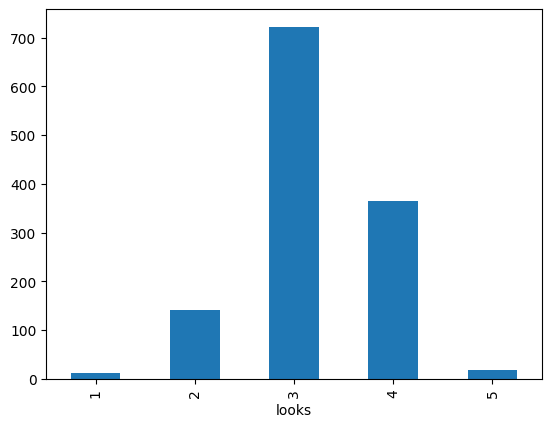

In [51]:
df.groupby('looks').count()['wage'].plot(kind='bar') # типичное нормальное распределение красоты

### Сводные таблицы

Можно посмотреть как одна наблюдаемая величина распределена в контексте других признаков.

In [52]:
# кросстабуляция. По сути в ячейках количество элементов, удовлетворяющие одновременно двум критериям
pd.crosstab(df['looks'], df['educ'])

educ,5,8,10,12,13,14,16,17
looks,,,,,,,,
1,4,1,0,5,2,0,1,0
2,8,8,21,49,27,7,6,16
3,23,26,111,267,134,25,73,63
4,7,9,23,138,80,18,39,50
5,0,0,1,9,3,1,2,3


In [53]:
wage_segments = np.round(np.log(df['wage']), 0)  # логарифмическая шкала зарплат с округлением, таким образом у нас 4 группы
exper_segments = np.round(np.power(df['exper'], 0.25), 1)  # магическая шкала опыта, чтобы получить несколько групп
pd.crosstab(wage_segments, exper_segments)

# Что мы можем сказать по поводу этих данных?

exper,0.0,1.0,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6
wage,,,,,,,,,,,,,,,,,
0.0,1,1,4,0,3,3,0,3,2,3,1,1,1,2,1,1,0
1.0,3,14,19,33,27,31,42,41,34,42,31,32,29,23,26,16,11
2.0,0,4,0,11,12,25,37,39,64,69,59,92,51,71,67,73,21
3.0,0,0,0,1,0,0,2,3,5,9,7,4,16,12,12,8,2
4.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0


Корреляция признаков между собой - corr()

In [54]:
corr = df.corr()
corr

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
wage,1.000000,0.234632,0.094529,0.006756,-0.059052,-0.313419,0.184521,-0.053653,0.212333,0.055019
exper,0.234632,1.000000,0.089792,-0.131609,0.007566,-0.247209,0.255607,-0.057328,-0.186200,-0.155035
union,0.094529,0.089792,1.000000,-0.022398,0.031939,-0.100037,0.053629,-0.103633,-0.096022,-0.043495
goodhlth,0.006756,-0.131609,-0.022398,1.000000,-0.034073,-0.039684,-0.013315,0.049947,0.107129,0.058558
black,-0.059052,0.007566,0.031939,-0.034073,1.000000,0.113703,-0.133306,0.017261,-0.138157,0.012098
female,-0.313419,-0.247209,-0.100037,-0.039684,0.113703,1.000000,-0.319228,0.267961,0.009105,0.017129
married,0.184521,0.255607,0.053629,-0.013315,-0.133306,-0.319228,1.000000,-0.075082,-0.047674,-0.064636
service,-0.053653,-0.057328,-0.103633,0.049947,0.017261,0.267961,-0.075082,1.000000,0.301628,0.010213
educ,0.212333,-0.186200,-0.096022,0.107129,-0.138157,0.009105,-0.047674,0.301628,1.000000,0.153842
looks,0.055019,-0.155035,-0.043495,0.058558,0.012098,0.017129,-0.064636,0.010213,0.153842,1.000000


Корреляции обычно не очень удобно рассматривать в виде чисел, легче анализировать картинки

<Axes: >

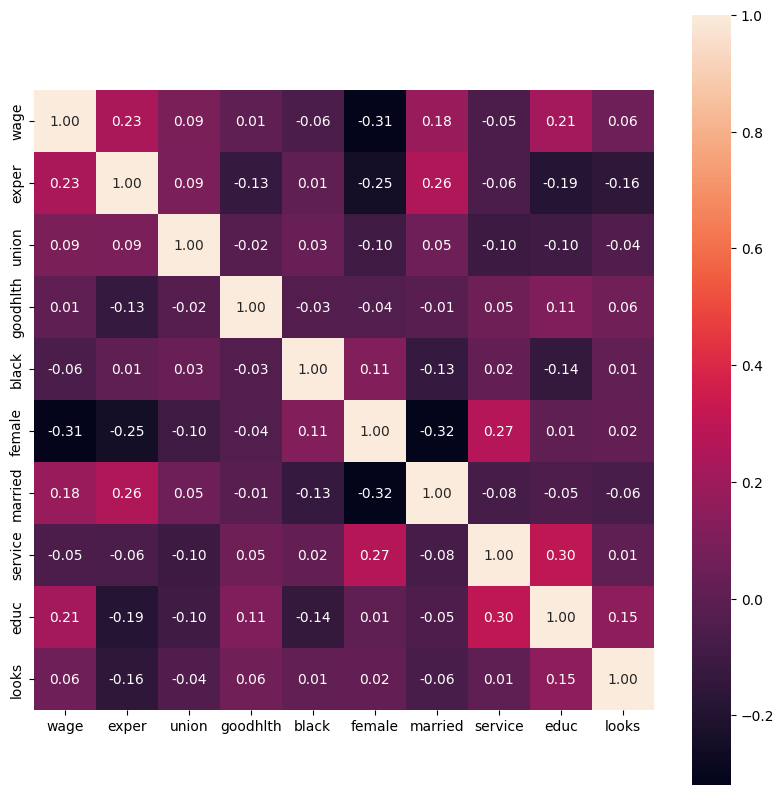

In [55]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10)) # изменим размер графика, сделаем кго больше
sns.heatmap(corr, square=True, annot=True, fmt=".2f")

### Генерация новых колонок

In [56]:
df.head() # посмотрим на 5 первых строк

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [57]:
df2 = df.copy() # копируем датафрейм чтобы не сломать исходный
df2['wage_segmens'] = np.round(np.log(df['wage']), 0)
df2['exper_segments'] = np.round(np.power(df['exper'], 0.25), 1)
df2.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks,wage_segmens,exper_segments
0,5.73,30,0,1,0,1,1,1,14,4,2.0,2.3
1,4.28,28,0,1,0,1,1,0,12,3,1.0,2.3
2,7.96,35,0,1,0,1,0,0,10,4,2.0,2.4
3,11.57,38,0,1,0,0,1,1,16,3,2.0,2.5
4,11.42,27,0,1,0,0,1,0,16,3,2.0,2.3
